In [3]:
import matplotlib.pyplot as plt

In [4]:
# reload packages
%load_ext autoreload
%autoreload 2

### Choose GPU (this may not be needed on your computer)

In [5]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


### load packages

In [6]:
from tfumap.umap import tfUMAP

/mnt/cube/tsainbur/Projects/github_repos/umap_tf_networks/tfumap/umap.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import umap
import pandas as pd

### Load dataset

In [8]:
import requests
import json
url = "https://raw.githubusercontent.com/duhaime/umap-zoo/03819ed0954b524919671a72f61a56032099ba11/data/json/bison.json"
animal = np.array(json.loads(requests.get(url).text)['3d'])
np.shape(animal)

(50000, 3)

(-1.05789, 0.98789, -0.489245, 0.660145)

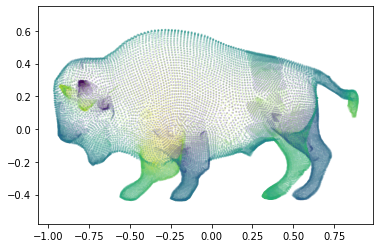

In [9]:
fig, ax = plt.subplots()
ax.scatter(animal[:,2], animal[:,1], s = 1, c = animal[:,0], alpha = 0.1)
ax.axis('equal')

In [10]:
X_train = animal
Y_train = animal[:, 2]
X_train_flat = X_train

### Create model and train

In [11]:
import phate

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

X_scaled = MinMaxScaler().fit_transform(X_train_flat)

In [28]:
??phate.PHATE

In [37]:
phate_op = phate.PHATE(n_jobs=-1, knn=150)
data_phate = phate_op.fit_transform(X_scaled)

Calculating PHATE...
  Running PHATE on 50000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 8.80 seconds.
    Calculating affinities...


/home/AD/tsainbur/anaconda3/envs/tfumap/lib/python3.7/site-packages/graphtools/graphs.py:293: RuntimeWarning: Detected zero distance between 23444 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  RuntimeWarning,


    Calculated affinities in 4.47 seconds.
  Calculated graph and diffusion operator in 13.57 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 9.35 seconds.
    Calculating KMeans...
    Calculated KMeans in 18.81 seconds.
  Calculated landmark operator in 29.96 seconds.
  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 0.88 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.37 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.76 seconds.
Calculated PHATE in 52.55 seconds.


In [38]:
z = data_phate

In [39]:
z.shape

(50000, 2)

### Plot model output

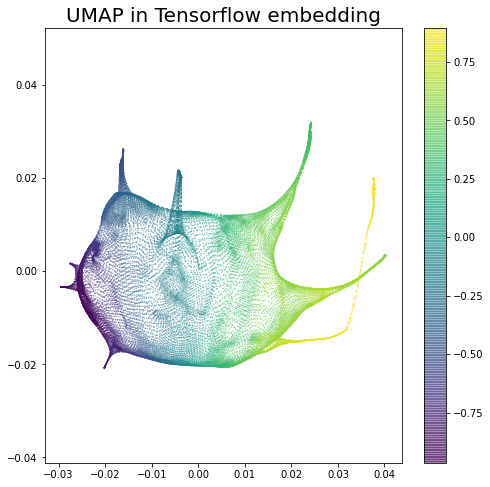

In [40]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=Y_train[:len(z)],
    cmap="viridis",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### Save output

In [41]:
from tfumap.paths import ensure_dir, MODEL_DIR

In [42]:
output_dir = MODEL_DIR/'projections'/ 'bison' / 'phate'
ensure_dir(output_dir)

In [43]:
np.save(output_dir / 'z.npy', z)